In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('telco_customer_churn.csv')


#Data exploration

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



                                                    #**Data cleaning**

In [6]:
df['TotalCharges'].head(20)

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
Name: TotalCharges, dtype: object

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce') #converting totalcharges to numeric datatype, if some values doesnt get converted to numeric type then coerce create NaN at that place , so thats counted as null.
df['TotalCharges'].dtype

dtype('float64')

In [8]:
df.isna().sum() #checking missing/null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df = df.dropna(subset = ['TotalCharges']) #dropping missing values

In [10]:
df.info() #conferming datatype after cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

                                                **understanding churn**

In [11]:
Churn_Count = df['Churn'].value_counts()     #overall churn count
Churn_Count

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [12]:
df['Churn'].value_counts(normalize = True)* 100                   #normalize=true converts counts to ratio and *100 into percentage

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

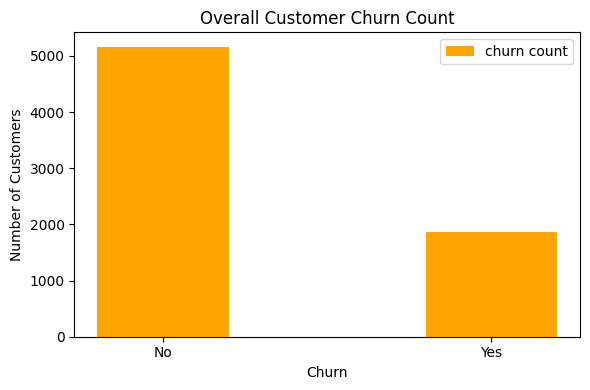

In [13]:
plt.figure(figsize= (6,4))
plt.bar(Churn_Count.index, Churn_Count.values, width = 0.4,color = 'orange', label= 'churn count')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Overall Customer Churn Count')
plt.legend()
plt.tight_layout()
plt.savefig('overall_customer_churn.png', dpi= 300, bbox_inches = 'tight')
plt.show()

In [14]:
pd.crosstab(df['Contract'], df['Churn'])                     #crosstab compares two categroical columsns and creates contigency table

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [15]:
Contract_Churn_Rate = pd.crosstab(df['Contract'], df['Churn'], normalize = 'index')* 100  #churn rate by contract, normalize= index -row wise percentage
Contract_Churn_Rate

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


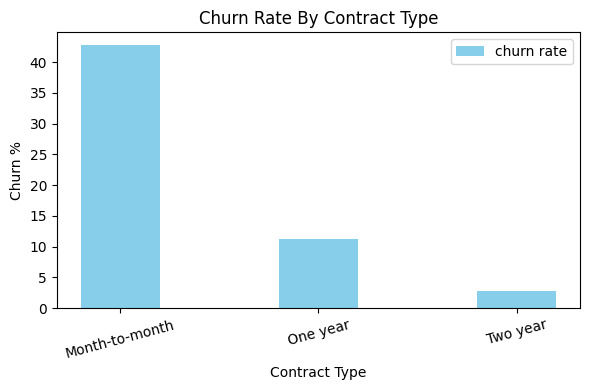

In [16]:
churn_yes = Contract_Churn_Rate['Yes']

plt.figure(figsize = (6,4))
plt.bar(churn_yes.index, churn_yes.values, color = 'skyblue', width = 0.4, label = 'churn rate')
plt.xlabel('Contract Type')
plt.ylabel('Churn %')
plt.title('Churn Rate By Contract Type')
plt.xticks(rotation= 15)
plt.legend()
plt.tight_layout()
plt.savefig('churn_rate_by_contract.png', dpi= 300, bbox_inches = 'tight')
plt.show()

In [17]:
tenure_bins = [0,12,24,48,72]
tenure_labels = ['0-12months','13-24months','25-48months','49+months']                    #creating tenure gruoups
df['tenureGroup'] = pd.cut(df['tenure'],bins = tenure_bins, labels = tenure_labels)        #pd.cut converts tenure into categories, bins into boundries and labels into names for better grouping analyis

In [18]:
tenure_churn_rate = pd.crosstab(df['tenureGroup'], df['Churn'], normalize = 'index')*100
tenure_churn_rate                                                                        #churn rate by tenure group

Churn,No,Yes
tenureGroup,,
0-12months,52.321839,47.678161
13-24months,71.289062,28.710938
25-48months,79.611041,20.388959
49+months,90.486824,9.513176


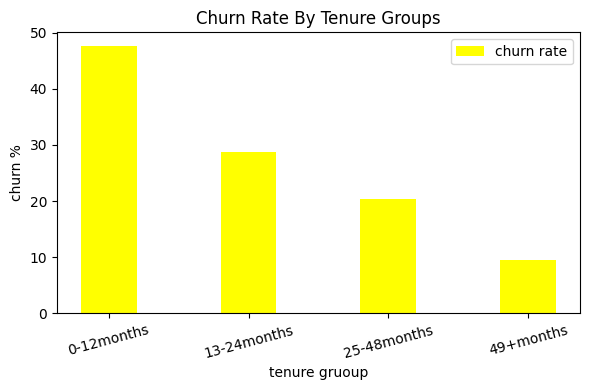

In [19]:
churn_yes_tenure = tenure_churn_rate['Yes']
plt.figure(figsize=(6,4))

plt.bar(churn_yes_tenure.index, churn_yes_tenure.values, color = 'yellow', width = 0.4, label= 'churn rate')
plt.xlabel('tenure gruoup')
plt.ylabel('churn %')
plt.title('Churn Rate By Tenure Groups')
plt.xticks(rotation = 15)
plt.legend()
plt.tight_layout()
plt.savefig('churn_rate_by_tenure.png', dpi=300, bbox_inches = 'tight')
plt.show()

In [20]:
df.groupby('Churn')['MonthlyCharges'].mean()              #avg monthly charges betn churned and retained customers to asses price sensitivity

Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

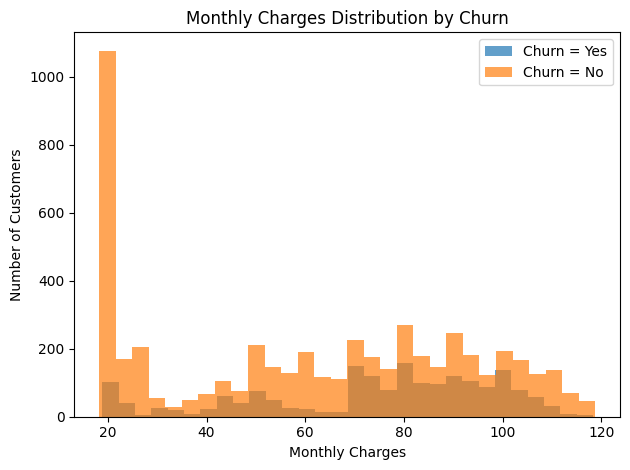

In [21]:
plt.figure()

plt.hist(df[df['Churn'] == 'Yes']['MonthlyCharges'], bins=30, alpha=0.7)
plt.hist(df[df['Churn'] == 'No']['MonthlyCharges'], bins=30, alpha=0.7)

plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.legend(['Churn = Yes', 'Churn = No'])
plt.tight_layout()
plt.savefig('monthy_charges_distribution.png', dpi = 300, bbox_inches = 'tight')

plt.show()


In [22]:
pd.crosstab(df['InternetService'], df['Churn'])

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [23]:
internet_churn_rate = pd.crosstab(df['InternetService'],df['Churn'],normalize='index')*100
internet_churn_rate

Churn,No,Yes
InternetService,,
DSL,81.001656,18.998344
Fiber optic,58.107235,41.892765
No,92.565789,7.434211


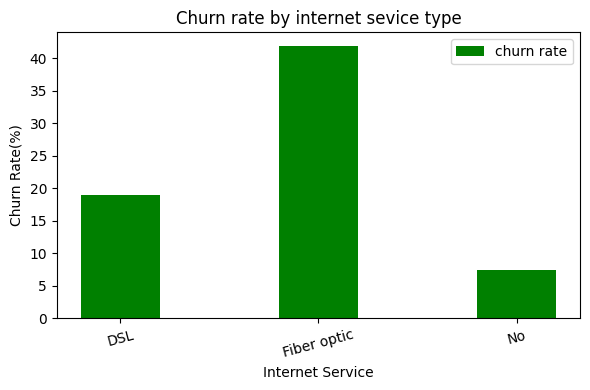

In [24]:
churn_yes_internet = internet_churn_rate['Yes']
plt.figure(figsize=(6,4))

plt.bar(churn_yes_internet.index, churn_yes_internet.values, color = 'green', width = 0.4, label= 'churn rate')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate(%)')
plt.title('Churn rate by internet sevice type')
plt.xticks(rotation= 15)
plt.legend()
plt.tight_layout()
plt.savefig('churn_rate_by_internet_servicetype.png', dpi = 300, bbox_inches = 'tight')
plt.show()